# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

browser.visit(url)

# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Save HTML content in a variable
html = browser.html

# Create a Beautiful Soup object
soup = soup(html, 'html.parser')


In [5]:
# Extract all rows of data
table = soup.find_all('table')[0]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_weather_data = []

# Loop through the scraped data to create a list of rows
table_rows = table.find_all('tr')
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text.strip() for i in td]
    mars_weather_data.append(row)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_weather_df = pd.DataFrame(mars_weather_data, columns=column_names)

In [8]:
# Reset Index
mars_weather_df = mars_weather_df.drop(index=0).reset_index(drop=True)

In [9]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mars_weather_df['id'] = mars_weather_df['id'].astype(int)
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(float)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
num_of_months = len(mars_weather_df['month'].unique())
print(f"There are {num_of_months} months on Mars.")

There are 12 months on Mars.


In [14]:
# 2. How many Martian days' worth of data are there?
num_of_sols = len(mars_weather_df['sol'].unique())
print(f"There are {num_of_sols} Martian days worth of data in the scraped dataset.")

There are 1867 Martian days worth of data in the scraped dataset.


In [15]:
# 3. What is the average low temperature by month?
min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Print the average low temperature by month
for month, temp in min_temp_by_month.items():
    print(f"Month {month}'s average low temperature is {temp:.2f}°F.")

Month 1's average low temperature is -77.16°F.
Month 2's average low temperature is -79.93°F.
Month 3's average low temperature is -83.31°F.
Month 4's average low temperature is -82.75°F.
Month 5's average low temperature is -79.31°F.
Month 6's average low temperature is -75.30°F.
Month 7's average low temperature is -72.28°F.
Month 8's average low temperature is -68.38°F.
Month 9's average low temperature is -69.17°F.
Month 10's average low temperature is -71.98°F.
Month 11's average low temperature is -71.99°F.
Month 12's average low temperature is -74.45°F.


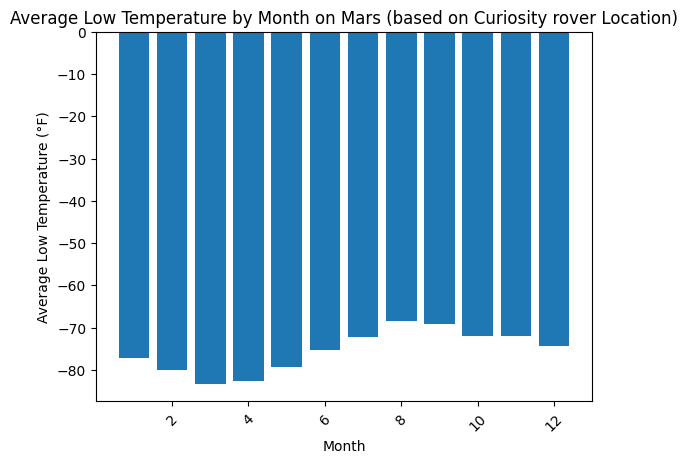

In [16]:
# Plot the average *low* temperature by month
plt.bar(min_temp_by_month.index, min_temp_by_month.values)
plt.xticks(rotation=45)
plt.ylabel('Average Low Temperature (°F)')
plt.xlabel('Month')
plt.title('Average Low Temperature by Month on Mars (based on Curiosity rover Location)')
plt.show()

In [17]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = min_temp_by_month.idxmin()
hottest_month = min_temp_by_month.idxmax()

print(f"The coldest month in Curiosity's location is Month {coldest_month} with an average low temperature of {min_temp_by_month[coldest_month]:.2f}°F.")
print(f"The hottest month in Curiosity's location is Month {hottest_month} with an average low temperature of {min_temp_by_month[hottest_month]:.2f}°F.")

The coldest month in Curiosity's location is Month 3 with an average low temperature of -83.31°F.
The hottest month in Curiosity's location is Month 8 with an average low temperature of -68.38°F.


In [18]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Print the average pressure by month
for month, pressure in avg_pressure_by_month.items():
    print(f"Month {month}'s average pressure is {pressure:.2f}.")

Month 1's average pressure is 862.49.
Month 2's average pressure is 889.46.
Month 3's average pressure is 877.32.
Month 4's average pressure is 806.33.
Month 5's average pressure is 748.56.
Month 6's average pressure is 745.05.
Month 7's average pressure is 795.11.
Month 8's average pressure is 873.83.
Month 9's average pressure is 913.31.
Month 10's average pressure is 887.31.
Month 11's average pressure is 857.01.
Month 12's average pressure is 842.16.


In [19]:
lowest_month = avg_pressure_by_month.idxmin()
highest_month = avg_pressure_by_month.idxmax()

print(f"The month with the lowest atmospheric pressure is Month {lowest_month} with an average atmospheric pressure of {avg_pressure_by_month[lowest_month]:.2f}")
print(f"The month with the highest atmospheric pressure is Month {highest_month} with an average atmospheric pressure of {avg_pressure_by_month[highest_month]:.2f}")

The month with the lowest atmospheric pressure is Month 6 with an average atmospheric pressure of 745.05
The month with the highest atmospheric pressure is Month 9 with an average atmospheric pressure of 913.31


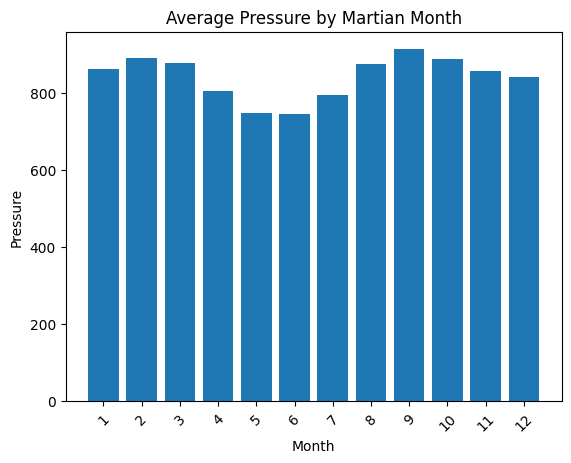

In [20]:
# Plot the average pressure by month
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month)
plt.xticks(avg_pressure_by_month.index, rotation=45)
plt.title('Average Pressure by Martian Month')
plt.ylabel('Pressure')
plt.xlabel('Month')
plt.show()

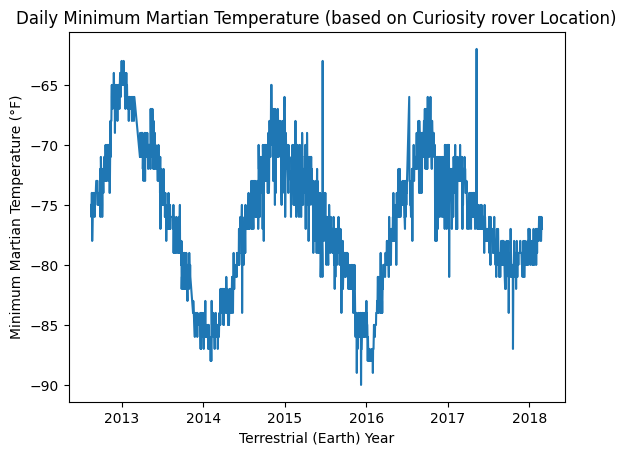

In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Visually estimate the result by plotting the daily minimum temperature
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'])
plt.xlabel('Terrestrial (Earth) Year')
plt.ylabel('Minimum Martian Temperature (°F)')
plt.title('Daily Minimum Martian Temperature (based on Curiosity rover Location)')
plt.show()

Upon visually inspecting the Average Low Temperature by Month on Mars bar graph, we can see that the 3rd month has the lowest temps and the 8th month has the highest temps on average. 

Upon visually inspecting the Daily Minimum Martian Temperature line graph, we can see that there are dips in 2014, 2016, and 2017 and peaks in 2013, 2014, and 2016 (ignoring the outliers).

Using these two pieces of information, we can then identify the lowest temp in Month 3 of 2014, 2016, and 2016 to get the average number of elapsed Terrestrial (Earth) days between the dips and then identify the highest temp in Month 8 of 2013, 2014, and 2016. And then we can average the difference in days in between those points.

In [22]:
# Filter the DataFrame to include only the data from March of 2014, 2016, and 2017
mars_weather_march = mars_weather_df[(mars_weather_df['month'] == 3) & (mars_weather_df['terrestrial_date'].dt.year.isin([2014, 2016, 2017]))]

# Find the row with the lowest temperature for each year
min_temps = mars_weather_march.loc[mars_weather_march.groupby(mars_weather_march['terrestrial_date'].dt.year)['min_temp'].idxmin()]

# Calculate the number of days between each of the min temps found
days_between_mins = (min_temps['terrestrial_date'] - min_temps['terrestrial_date'].shift(1)).iloc[1:]

# # Calculate the average difference in days
avg_days_between_mins = days_between_mins.mean().days

# Print the results
print(f"The average number of terrestrial days between each of the lowest temperatures is {avg_days_between_mins:.0f} days.")

The average number of terrestrial days between each of the lowest temperatures is 677 days.


In [23]:
# Filter the DataFrame to include only the data from August of 2013, 2014, and 2016
mars_weather_august = mars_weather_df[(mars_weather_df['month'] == 8) & (mars_weather_df['terrestrial_date'].dt.year.isin([2013, 2014, 2016]))]

# Find the row with the highest temperature for each year
max_temps = mars_weather_august.loc[mars_weather_august.groupby(mars_weather_august['terrestrial_date'].dt.year)['min_temp'].idxmax()]

# Calculate the number of days between each of the max temps found
days_between_maxs = (max_temps['terrestrial_date'] - max_temps['terrestrial_date'].shift()).dt.days

# Calculate the average difference in days
avg_days_between_maxs = days_between_maxs.mean()

# Print the result
print(f"The average number of terrestrial days between each of the highest temperatures is {avg_days_between_maxs:.0f} days.")

The average number of terrestrial days between each of the highest temperatures is 686 days.


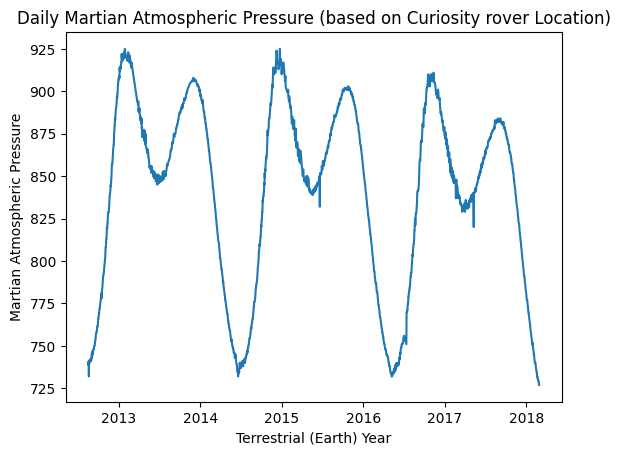

In [24]:
# Visually estimate the result by plotting the daily atmospheric pressure
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['pressure'])
plt.xlabel('Terrestrial (Earth) Year')
plt.ylabel('Martian Atmospheric Pressure')
plt.title('Daily Martian Atmospheric Pressure (based on Curiosity rover Location)')
plt.show()

Upon visually inspecting the Average Pressure by Martian Month, we can see that atmospheric pressure is highest in Month 9 and lowest in Month 6.

Upon visually inspecting the Daily Martian Atmospheric Pressure line graph, we can see that there are peaks in 2013, 2015, and 2016 and dips in 2012, 2014, 2016, and 2018. 

Using these two pieces of information, we can then identify the greatest atmospheric pressure in Month 9 in 2013, 2015, and 2016 and the lowest atmospheric pressure in Month 6 in 2012, 2014, 2016, and 2018. And then we can average the difference in days in between those points.

In [25]:
# Filter the DataFrame to include only the data from September of 2013, 2015, and 2016
mars_pressure_september = mars_weather_df[(mars_weather_df['month'] == 9) & (mars_weather_df['terrestrial_date'].dt.year.isin([2014, 2016, 2017]))]

# Find the row with the lowest temperature for each year
high_pressure = mars_weather_march.loc[mars_weather_march.groupby(mars_weather_march['terrestrial_date'].dt.year)['pressure'].idxmin()]

# Calculate the number of days between each of the min temps found
days_between_highs = (min_temps['terrestrial_date'] - min_temps['terrestrial_date'].shift(1)).iloc[1:]

# # Calculate the average difference in days
avg_days_between_highs = days_between_highs.mean().days

# Print the results
print(f"The average number of terrestrial days between each of the greatest atmospheric pressures is {avg_days_between_highs:.0f} days.")

The average number of terrestrial days between each of the greatest atmospheric pressures is 677 days.


In [26]:
# Filter the DataFrame to include only the data from June of 2012, 2014, 2016, and 2018
mars_pressure_june = mars_weather_df[(mars_weather_df['month'] == 6) & (mars_weather_df['terrestrial_date'].dt.year.isin([2014, 2016, 2017]))]

# Find the row with the lowest temperature for each year
low_pressure = mars_pressure_june.loc[mars_pressure_june.groupby(mars_pressure_june['terrestrial_date'].dt.year)['pressure'].idxmin()]

# Calculate the number of days between each of the min temps found
days_between_lows = (min_temps['terrestrial_date'] - min_temps['terrestrial_date'].shift(1)).iloc[1:]

# # Calculate the average difference in days
avg_days_between_lows = days_between_lows.mean().days

# Print the results
print(f"The average number of terrestrial days between each of the lowest atmospheric pressures is {avg_days_between_lows:.0f} days.")

The average number of terrestrial days between each of the lowest atmospheric pressures is 677 days.


With the averages for the difference in days for highest temps, lowest temps, greatest atmospheric pressure, and lowest atmospheric pressure, we can then get the average of those to estimate the number of terrestrial (Earth) days in a Martian year.

In [27]:
# Average of days for avg_days_between_max_temps and avg_days_between_min_temps
avg_days_between = (avg_days_between_maxs + avg_days_between_mins + avg_days_between_highs + avg_days_between_lows) / 4

# Print the result
print(f"There are about {avg_days_between:.0f} terrestrial (Earth) days in a Martian year.")

There are about 679 terrestrial (Earth) days in a Martian year.


According to [NASA](https://mars.nasa.gov/resources/21392/mars-in-a-minute-how-long-is-a-year-on-mars/), there are actually 687 Earth days in a Mars year. The estimate in this code isn't too bad given there is such limited data and used such rudimentary methods for making an estimation.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather.csv', index=False)

In [29]:
browser.quit()